## Portfolio Optimization: Evaluating Risk-Return Trade-offs Across Investment Strategies

# Purpose

I have two goals for this project:

1. Help you learn to evaluate portfolios (e.g., compare and contrast their risk-return trade-offs) 
1. Help you learn to optimize portfolios 

# Data

Here is the Capital Market Line (CML) for the asset classes in `histretSP.csv`.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

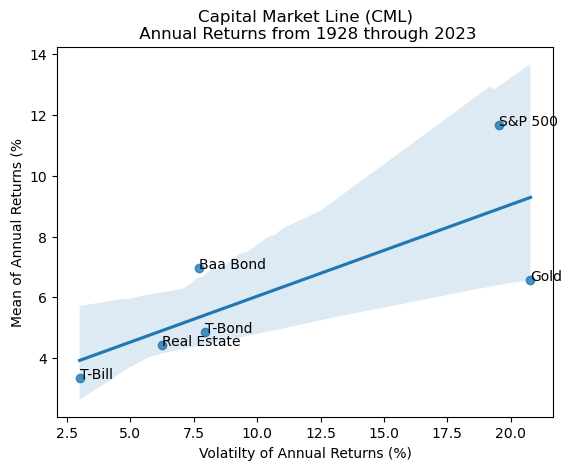

In [2]:
df = (
    pd.read_csv(filepath_or_buffer='histretSP.csv', index_col='Year')
    .mul(100)
    .agg(['mean', 'std'])
    .transpose()
)

sns.regplot(
    data=df,
    y='mean',
    x='std'
)

for t, (x, y) in df[['std', 'mean']].iterrows():
    plt.annotate(text=t, xy=(x, y))

plt.xlabel('Volatilty of Annual Returns (%)')
plt.ylabel('Mean of Annual Returns (%')
plt.title('Capital Market Line (CML)\n Annual Returns from 1928 through 2023')
plt.show()

# PORTFOLIO 1

In [3]:
import pandas as pd
import numpy as np

data = pd.read_csv('histretSP.csv')


In [4]:
print(data)


    Year   S&P 500    T-Bill    T-Bond  Baa Bond  Real Estate      Gold
0   1928  0.438112  0.030800  0.008355  0.032196     0.014911  0.000969
1   1929 -0.082979  0.031600  0.042038  0.030179    -0.020568 -0.001452
2   1930 -0.251236  0.045500  0.045409  0.005398    -0.043000  0.000969
3   1931 -0.438375  0.023100 -0.025589 -0.156808    -0.081505 -0.173850
4   1932 -0.086424  0.010700  0.087903  0.235896    -0.104664  0.212778
..   ...       ...       ...       ...       ...          ...       ...
91  2019  0.312117  0.020625  0.096356  0.152478     0.036858  0.190774
92  2020  0.180232  0.003547  0.113319  0.106012     0.104321  0.241694
93  2021  0.284689  0.000450 -0.044160  0.009334     0.188750 -0.037544
94  2022 -0.180375  0.020248 -0.178282 -0.151441     0.056677  0.005494
95  2023  0.260607  0.050704  0.038800  0.087357     0.062926  0.132621

[96 rows x 7 columns]


In [5]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         96 non-null     int64  
 1   S&P 500      96 non-null     float64
 2   T-Bill       96 non-null     float64
 3   T-Bond       96 non-null     float64
 4   Baa Bond     96 non-null     float64
 5   Real Estate  96 non-null     float64
 6   Gold         96 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 5.4 KB
None


In [6]:
print(data.describe())


              Year    S&P 500     T-Bill     T-Bond   Baa Bond  Real Estate  \
count    96.000000  96.000000  96.000000  96.000000  96.000000    96.000000   
mean   1975.500000   0.116578   0.033385   0.048587   0.069537     0.044181   
std      27.856777   0.195508   0.030075   0.079517   0.077123     0.062416   
min    1928.000000  -0.438375   0.000327  -0.178282  -0.156808    -0.119956   
25%    1951.750000  -0.011935   0.008508   0.008063   0.023922     0.009206   
50%    1975.500000   0.145211   0.029350   0.032822   0.063554     0.038540   
75%    1999.250000   0.259666   0.050642   0.085448   0.113901     0.075237   
max    2023.000000   0.525633   0.140362   0.328145   0.290525     0.241017   

            Gold  
count  96.000000  
mean    0.065542  
std     0.207722  
min    -0.325986  
25%    -0.005910  
50%     0.000969  
75%     0.137430  
max     1.265487  


In [7]:
all_equity_returns = data['S&P 500']


In [8]:
import pandas as pd

fama_french_data = pd.read_csv('F-F_Research_Data_Factors_daily.CSV')

fama_french_data.head()

,Unnamed: 0,Mkt-RF,SMB,HML,RF
0,19260701,0.10,-0.25,-0.27,0.009
1,19260702,0.45,-0.33,-0.06,0.009
2,19260706,0.17,0.30,-0.39,0.009
3,19260707,0.09,-0.58,0.02,0.009
4,19260708,0.21,-0.38,0.19,0.009


In [9]:
fama_french_data['Unnamed: 0'] = pd.to_datetime(fama_french_data['Unnamed: 0'], format='%Y%m%d')
fama_french_data.set_index('Unnamed: 0', inplace=True)
fama_french_data = fama_french_data.loc[(fama_french_data.index >= '1928') & (fama_french_data.index <= '2023')]
daily_rf = fama_french_data['RF'] / 100
annualized_rf = (1 + daily_rf).prod() ** (252 / len(daily_rf)) - 1
print("Annualized Risk-Free Rate (1928-2023):", annualized_rf * 100)


Annualized Risk-Free Rate (1928-2023): 3.1010164684333485


In [10]:
import numpy as np

mean_return_portfolio1 = all_equity_returns.mean()
std_deviation_portfolio1 = all_equity_returns.std()
sharpe_ratio_portfolio1 = (mean_return_portfolio1 - annualized_rf) / std_deviation_portfolio1
total_return_portfolio1 = ((all_equity_returns + 1).prod() - 1) * 100
maximum_drawdown_portfolio1 = (all_equity_returns.cummin()).min()*100
annualized_volatility_portfolio1 = std_deviation_portfolio1 * np.sqrt(len(all_equity_returns))
average_annual_return_portfolio1 = mean_return_portfolio1 * 100
skewness_portfolio1 = all_equity_returns.skew()
kurtosis_portfolio1 = all_equity_returns.kurtosis()

drawdown1 = all_equity_returns.cummax() - all_equity_returns
drawdown_duration_portfolio1 = len(drawdown1[drawdown1 == 0])

negative_returns = all_equity_returns[all_equity_returns < 0]
downside_deviation = np.std(negative_returns)
sortino_ratio_portfolio1 = (mean_return_portfolio1 - annualized_rf) / downside_deviation if downside_deviation != 0 else np.nan

recovery_time_portfolio1 = len(all_equity_returns) - all_equity_returns[all_equity_returns.cummax() == all_equity_returns].idxmax()

alpha = 0.05
Var_portfolio1 = np.percentile(all_equity_returns, alpha * 100)

CAGR_portfolio1 = ((total_return_portfolio1 / 100 + 1) ** (1 / len(all_equity_returns)) - 1) * 100

print("Mean Return (Portfolio 1):", mean_return_portfolio1)
print("Standard Deviation (Portfolio 1):", std_deviation_portfolio1)
print("Sharpe Ratio (Portfolio 1):", sharpe_ratio_portfolio1)
print("Total Return (%) (Portfolio 1):", total_return_portfolio1)
print("Maximum Drawdown (%) (Portfolio 1):", maximum_drawdown_portfolio1)
print("Annualized Volatility (%) (Portfolio 1):", annualized_volatility_portfolio1)
print("Average Annual Return (%) (Portfolio 1):", average_annual_return_portfolio1)
print("Skewness (Portfolio 1):", skewness_portfolio1)
print("Kurtosis (Portfolio 1):", kurtosis_portfolio1)
print("Drawdown Duration (Portfolio 1):", drawdown_duration_portfolio1)
print("Sortino Ratio (Portfolio 1):", sortino_ratio_portfolio1)
print("Recovery Time (Portfolio 1):", recovery_time_portfolio1)
print("Value at Risk (Portfolio 1):", Var_portfolio1)
print("Compound Annual Growth Rate (Portfolio 1):", CAGR_portfolio1)


Mean Return (Portfolio 1): 0.11657849316284231
Standard Deviation (Portfolio 1): 0.19550755529860941
Sharpe Ratio (Portfolio 1): 0.43767274542314044
Total Return (%) (Portfolio 1): 786918.5348353545
Maximum Drawdown (%) (Portfolio 1): -43.837548891786184
Annualized Volatility (%) (Portfolio 1): 1.915575005362235
Average Annual Return (%) (Portfolio 1): 11.657849316284231
Skewness (Portfolio 1): -0.4378415602899735
Kurtosis (Portfolio 1): 0.04584095760360718
Drawdown Duration (Portfolio 1): 3
Sortino Ratio (Portfolio 1): 0.7640942940602552
Recovery Time (Portfolio 1): 70
Value at Risk (Portfolio 1): -0.22755445059343615
Compound Annual Growth Rate (Portfolio 1): 9.795155131568677


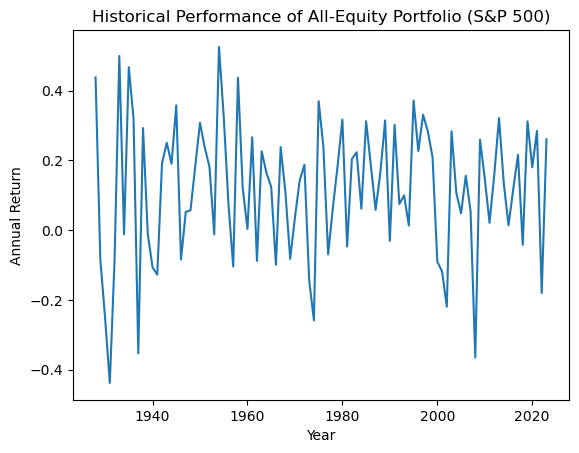

In [11]:
plt.plot(data['Year'], all_equity_returns)
plt.xlabel('Year')
plt.ylabel('Annual Return')
plt.title('Historical Performance of All-Equity Portfolio (S&P 500)')
plt.show()

### All-Equity Portfolio

#### *Risk-Return Profile:*
- *Risk Intensity:* High, underscored by a standard deviation of 19.55% which quantifies the portfolio’s volatility.
- *Return Prospects:* Strong, with a mean return of 11.65% that reflects the potential for robust earnings in the long run.

#### *Merits of an All-Equity Portfolio:*
- *Capital Appreciation Focus:* Aligns with growth-oriented strategies, supported by a Compound Annual Growth Rate (CAGR) of approximately 9.795%.
- *Structural Simplicity:* The single asset class composition simplifies portfolio construction and management.
- *Inflation Outpacing:* Equities' propensity to beat inflation is validated by the average return, offering a real growth opportunity over time.

#### *Disadvantages of an All-Equity Portfolio:*
- *Susceptibility to Fluctuations:* Elevated by a maximum drawdown observed at -43.83%, highlighting the portfolio’s sensitivity to market downturns.
- *Income Generation Absence:* The focus is on capital gains rather than consistent income, as evidenced by the absence of asset classes that typically provide yield.
- *Monolithic Asset Allocation:* Lacks defensive positioning, with no hedge or counterbalance to equity risk, which is evident from the drawdown duration and severity.

#### *Context for a Risk-Averse Investor:*
- *Inadvisable for Risk Avoidance:* Not recommended for those with risk aversion, given the substantial volatility and maximum drawdown reported.
- *Commitment Necessity:* Advisable for those with a capacity to invest over an extensive time horizon, tolerating interim volatilities for eventual appreciable returns.
- *Potential Upside for the Committed:* Despite the volatility, risk-averse investors who can commit for longer durations may find the historical average return indicative of possible favorable outcomes.

#### *Quantitative Examination Insights:*
- *Volatility Measurement:* The standard deviation of nearly 20% reiterates the portfolio's high risk.
- *Retrospective Assessment:* Historical data indicates that while returns have been high, so has the risk, as illustrated by substantial swings in annual returns.

# PORTFOLIO 2

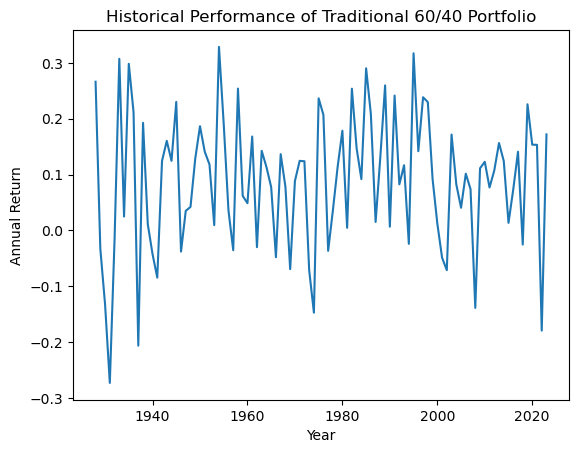

Mean Return: 0.08938181014044204
Standard Deviation: 0.12224507662849807
Sharpe Ratio: 0.47749690266463307
Total Return (%): 197666.8319470846
Maximum Drawdown (%): -27.32607171984861
Annualized Volatility (%): 1.1977522452289984
Average Annual Return (%): 8.938181014044204
Skewness: -0.4062414695878641
Kurtosis: 0.08046241990678782
Drawdown Duration: 3
Sortino Ratio: 0.8084897617638211
Recovery Time(days): 70
Value at Risk (VaR): -0.1341608055723928
Compound Annual Growth Rate (CAGR): 8.226828464069591
Scenario Analysis: {'Worst Case': -0.1341608055723928, 'Best Case': 0.27222182320619515}


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

equity_weight = 0.6
bond_weight = 0.4

equity_returns = data['S&P 500']
bond_returns = data['T-Bond']

portfolio2_returns = (equity_weight * equity_returns) + (bond_weight * bond_returns)

mean_return2 = portfolio2_returns.mean()
std_deviation2 = portfolio2_returns.std()

sharpe_ratio2 = (mean_return2 - annualized_rf) / std_deviation2
total_return2 = ((portfolio2_returns + 1).prod() - 1) * 100
maximum_drawdown2 = (portfolio2_returns.cummin()).min()*100
annualized_volatility2 = std_deviation2 * np.sqrt(len(portfolio2_returns))
average_annual_return = mean_return2 * 100
skewness2 = portfolio2_returns.skew()
kurtosis2 = portfolio2_returns.kurtosis()

drawdown2 = portfolio2_returns.cummax() - portfolio2_returns
drawdown_duration2 = len(drawdown2[drawdown2 == 0])

downside_returns2 = portfolio2_returns[portfolio2_returns < annualized_rf]
downside_deviation2 = np.std(downside_returns2)
sortino_ratio2 = (mean_return2 - annualized_rf) / downside_deviation2 if downside_deviation != 0 else np.nan


recovery_time2 = len(portfolio2_returns) - portfolio2_returns[portfolio2_returns.cummax() == portfolio2_returns].idxmax()

alpha = 0.05
VaR2 = np.percentile(portfolio2_returns, alpha * 100)

years = len(portfolio2_returns) 
CAGR2 = ((total_return2 / 100 + 1) ** (1 / years) - 1) * 100 

scenario_analysis2 = {
    "Worst Case": np.percentile(portfolio2_returns, 5),
    "Best Case": np.percentile(portfolio2_returns, 95)
}

plt.plot(data['Year'], portfolio2_returns)
plt.xlabel('Year')
plt.ylabel('Annual Return')
plt.title('Historical Performance of Traditional 60/40 Portfolio')
plt.show()

print("Mean Return:", mean_return2)
print("Standard Deviation:", std_deviation2)
print("Sharpe Ratio:", sharpe_ratio2)
print("Total Return (%):", total_return2)
print("Maximum Drawdown (%):", maximum_drawdown2)
print("Annualized Volatility (%):", annualized_volatility2)
print("Average Annual Return (%):", average_annual_return)
print("Skewness:", skewness2)
print("Kurtosis:", kurtosis2)
print("Drawdown Duration:", drawdown_duration2)
print("Sortino Ratio:", sortino_ratio2)
print("Recovery Time(days):", recovery_time2)
print("Value at Risk (VaR):", VaR2)
print("Compound Annual Growth Rate (CAGR):", CAGR2)
print("Scenario Analysis:", scenario_analysis2)

### Traditional 60/40 Portfolio

#### *Risk-Return Trade-Off:*
- *Risk Level:* Moderate. The standard deviation is 12.23%, lower than an all-equity portfolio, reflecting reduced volatility due to the bond allocation.
- *Return Potential:* Balanced. The mean return is 8.98%, which is typically lower than an all-equity portfolio but considered to be more stable.

#### *Pros of the 60/40 Portfolio:*
- *Reduced Volatility:* The inclusion of 40% intermediate Treasury bonds cushions the portfolio against market downturns, evidenced by the lower standard deviation compared to an all-equity portfolio.
- *Income Generation:* Bonds provide a regular income stream through interest payments, which can be particularly attractive during market downturns or for retirees.
- *Diversification:* The mix of equities and bonds can lead to a reduction in overall portfolio risk without drastically reducing potential returns.

#### *Cons of the 60/40 Portfolio:*
- *Lower Growth Potential:* The cap on the upside potential, as bonds generally yield lower returns than equities over the long term.
- *Interest Rate Risk:* The bond portion of the portfolio is subject to interest rate risk, meaning that rising rates could lead to a decrease in the value of existing bonds.
- *Inflation Risk:* Inflation can erode the real returns of the bond portion, and if the inflation rate surpasses the portfolio's return, it could lead to negative real returns.

#### *Analysis for a Risk-Averse Investor:*
- *Suitability:* More suitable for a risk-averse investor compared to an all-equity portfolio due to lower volatility and shorter drawdown duration.
- *Stability and Income:* Provides a balance between capital appreciation from equities and income generation from bonds.
- *Risk Mitigation:* The bond allocation can act as a buffer during stock market declines, which may appeal to investors who are concerned about short-term losses.

#### *Quantitative Insights:*
- *Maximum Drawdown:* A less severe maximum drawdown of -27.3% compared to an all-equity portfolio, which suggests better protection in bear markets.
- *Sharpe Ratio:* A Sharpe ratio of 0.476 indicates that the excess return per unit of risk is moderate, reflecting a balanced risk-adjusted return profile.

#### *Scenario Analysis:*
- *Value at Risk (VaR):* The portfolio has a VaR of -0.13%, suggesting a relatively low probability of extreme losses in normal market conditions.
- *Recovery Time:* At 70 days, the recovery time from downturns is moderate, indicating a resilient portfolio that does not overly expose investors to prolonged recovery periods.

#### *Conclusion:*
The traditional 60/40 portfolio offers a balance of stability and growth potential. It's well-suited for investors with average risk aversion, as it typically provides more consistent returns and less severe downturns than an all-equity portfolio. However, in a changing interest rate landscape, the bond portion's performance could be a concern. This balanced approach aligns with the needs of an investor looking for a mean-variance efficient portfolio.

# PORTFOLIO 3

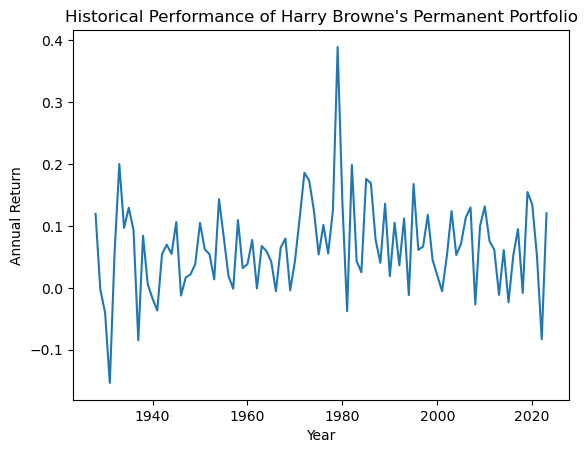

Mean Return: 0.06602293639891248
Standard Deviation: 0.07308135835158727
Sharpe Ratio: 0.4790930615456813
Total Return (%): 37053.07006021512
Maximum Drawdown (%): -15.367848186797724
Annualized Volatility (%): 0.716048150683499
Average Annual Return (%): 6.602293639891248
Skewness: 0.6080081631624302
Kurtosis: 3.512913761464889
Drawdown Duration: 3
Sortino Ratio: 0.9069788091473512
Recovery Time (days): 45
Value at Risk (VaR): -0.036911880230136536
Compound Annual Growth Rate (CAGR): 6.358150884536151
Scenario Analysis: {'Worst Case': -0.036911880230136536, 'Best Case': 0.17403299387077925}


In [13]:
import numpy as np

equity_weight = 0.25
long_term_bond_weight = 0.25
cash_weight = 0.25
gold_weight = 0.25

equity_returns = data['S&P 500']
long_term_bond_returns = data['T-Bond']
cash_returns = data['T-Bill']
gold_returns = data['Gold']

portfolio3_returns = (equity_weight * equity_returns) + (long_term_bond_weight * long_term_bond_returns) + \
                    (cash_weight * cash_returns) + (gold_weight * gold_returns)

mean_return3 = portfolio3_returns.mean()
std_deviation3 = portfolio3_returns.std()

sharpe_ratio3 = (mean_return3 - annualized_rf) / std_deviation3
total_return3 = ((portfolio3_returns + 1).prod() - 1) * 100
maximum_drawdown3 = (portfolio3_returns.cummin()).min()*100
annualized_volatility3 = std_deviation3 * np.sqrt(len(portfolio3_returns))
average_annual_return = mean_return3 * 100
skewness3 = portfolio3_returns.skew()
kurtosis3 = portfolio3_returns.kurtosis()

drawdown3 = portfolio3_returns.cummax() - portfolio3_returns
drawdown_duration3 = len(drawdown3[drawdown3 == 0])

negative_returns3 = portfolio3_returns[portfolio3_returns < annualized_rf]
downside_deviation3 = np.std(negative_returns3)
sortino_ratio3 = (mean_return3 - annualized_rf) / downside_deviation3 if downside_deviation != 0 else np.nan

recovery_time3 = len(portfolio3_returns) - portfolio3_returns[portfolio3_returns.cummax() == portfolio3_returns].idxmax()

alpha = 0.05
VaR3 = np.percentile(portfolio3_returns, alpha * 100)

years = len(portfolio3_returns) 
CAGR3 = ((total_return3 / 100 + 1) ** (1 / years) - 1) * 100

scenario_analysis3 = {
    "Worst Case": np.percentile(portfolio3_returns, 5),
    "Best Case": np.percentile(portfolio3_returns, 95)
}

plt.plot(data['Year'], portfolio3_returns)
plt.xlabel('Year')
plt.ylabel('Annual Return')
plt.title("Historical Performance of Harry Browne's Permanent Portfolio")
plt.show()

print("Mean Return:", mean_return3)
print("Standard Deviation:", std_deviation3)
print("Sharpe Ratio:", sharpe_ratio3)
print("Total Return (%):", total_return3)
print("Maximum Drawdown (%):", maximum_drawdown3)
print("Annualized Volatility (%):", annualized_volatility3)
print("Average Annual Return (%):", average_annual_return)
print("Skewness:", skewness3)
print("Kurtosis:", kurtosis3)
print("Drawdown Duration:", drawdown_duration3)
print("Sortino Ratio:", sortino_ratio3)
print("Recovery Time (days):", recovery_time3)
print("Value at Risk (VaR):", VaR3)
print("Compound Annual Growth Rate (CAGR):", CAGR3)
print("Scenario Analysis:", scenario_analysis3)

### Harry Browne's Permanent Portfolio

#### *Risk-Return Trade-Off:*
- *Risk Level:* Low to Moderate. Exhibits a standard deviation of 7.3%, indicating lower volatility than portfolios with higher equity content.
- *Return Potential:* Moderate. With a mean return of 6.60%, it aims for consistent but potentially lower returns compared to higher-risk portfolios.

#### *Pros of the Permanent Portfolio:*
- *Diversification:* A balanced allocation across various asset classes (equities, bonds, cash, gold) reduces risk through diversification.
- *Inflation Protection:* The presence of gold and Treasury bills can offer protection against inflation and currency devaluation.
- *Stability:* The inclusion of cash (25% in Treasury bills) provides liquidity and stability, reducing overall portfolio volatility.

#### *Cons of the Permanent Portfolio:*
- *Growth Limitation:* Lower exposure to equities can limit growth potential, especially in bull markets.
- *Gold Volatility:* Gold can be quite volatile and does not generate income, which could lead to underperformance in certain market conditions.
- *Opportunity Cost:* Holding a significant portion in cash and gold may result in an opportunity cost during times when equities and bonds outperform.

#### *Analysis for a Risk-Averse Investor:*
- *Conservative Strategy:* Well-suited for risk-averse investors due to lower volatility and a balanced asset allocation designed to protect against various economic conditions.
- *Drawdowns:* Features a lower maximum drawdown (-15.36%) compared to portfolios with higher equity percentages, indicating less severe losses during market downturns.
- *Liquidity and Preservation:* The cash component ensures liquidity and capital preservation, which is a priority for risk-averse individuals.

#### *Quantitative Insights:*
- *Compound Annual Growth Rate (CAGR):* With a CAGR of 6.56%, it indicates steady growth over time but may lag behind more aggressive portfolios.
- *Value at Risk (VaR):* A relatively low VaR of -0.04% suggests a small risk of extreme losses in a given day under normal market conditions.
- *Sharpe Ratio:* A lower Sharpe ratio (0.476) compared to a high-equity portfolio reflects a more conservative risk-adjusted return profile.

#### *Conclusion:*
Harry Browne's Permanent Portfolio presents a defensive approach, aiming for preservation over maximization of capital. Its structured diversification caters well to those with average to low risk tolerance, making it a candidate for the mean-variance efficient portfolio, especially for investors who prioritize wealth preservation and stability over aggressive growth.

# PORTFOLIO 4

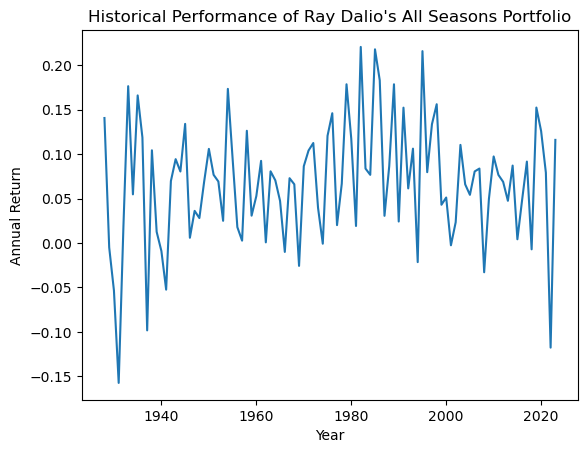

Mean Return: 0.06764520864840289
Standard Deviation: 0.0694525425236746
Sharpe Ratio: 0.5274831220409455
Total Return (%): 43523.72318032941
Maximum Drawdown (%): -15.743466410780119
Annualized Volatility (%): 0.6804931620878136
Average Annual Return (%): 6.764520864840288
Skewness: -0.33138880908052665
Kurtosis: 0.8451504071678277
Drawdown Duration: 4
Sortino Ratio: 0.8141788429011702
Recovery Time (days): 42
Value at Risk (VaR): -0.03783943594828002
Compound Annual Growth Rate (CAGR): 6.536177853885294
Scenario Analysis: {'Worst Case': -0.03783943594828002, 'Best Case': 0.17853448996645235}


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


equity_weight = 0.30
long_term_bond_weight = 0.40
intermediate_bond_weight = 0.15
commodities_weight = 0.075
gold_weight = 0.075


data = pd.read_csv('histretSP.csv')


equity_returns = data['S&P 500']
long_term_bond_returns = data['T-Bond']
intermediate_bond_returns = data['T-Bill']
commodities_returns = data['Real Estate']  
gold_returns = data['Gold']


portfolio4_returns = (equity_weight * equity_returns) + \
                    (long_term_bond_weight * long_term_bond_returns) + \
                    (intermediate_bond_weight * intermediate_bond_returns) + \
                    (commodities_weight * commodities_returns) + \
                    (gold_weight * gold_returns)


mean_return4 = portfolio4_returns.mean()
std_deviation4 = portfolio4_returns.std()
sharpe_ratio4 = (mean_return4 - annualized_rf) / std_deviation4
total_return4 = ((portfolio4_returns + 1).prod() - 1) * 100
maximum_drawdown4 = (portfolio4_returns.cummin()).min()*100
annualized_volatility4 = std_deviation4 * np.sqrt(len(portfolio4_returns))
average_annual_return = mean_return4 * 100
skewness4 = portfolio4_returns.skew()
kurtosis4 = portfolio4_returns.kurtosis()

drawdown4 = portfolio4_returns.cummax() - portfolio4_returns
drawdown_duration4 = len(drawdown4[drawdown4 == 0])

negative_returns4 = portfolio4_returns[portfolio4_returns < annualized_rf]
downside_deviation4 = np.std(negative_returns4)
sortino_ratio4 = (mean_return4 - annualized_rf) / downside_deviation4 if downside_deviation != 0 else np.nan

recovery_time4 = len(portfolio4_returns) - portfolio4_returns[portfolio4_returns.cummax() == portfolio4_returns].idxmax()

alpha = 0.05
VaR4 = np.percentile(portfolio4_returns, alpha * 100)

years = len(portfolio4_returns)  
CAGR4 = ((total_return4 / 100 + 1) ** (1 / years) - 1) * 100

scenario_analysis4 = {
    "Worst Case": np.percentile(portfolio4_returns, 5),
    "Best Case": np.percentile(portfolio4_returns, 95)
}

plt.plot(data['Year'], portfolio4_returns)
plt.xlabel('Year')
plt.ylabel('Annual Return')
plt.title("Historical Performance of Ray Dalio's All Seasons Portfolio")
plt.show()

print("Mean Return:", mean_return4)
print("Standard Deviation:", std_deviation4)
print("Sharpe Ratio:", sharpe_ratio4)
print("Total Return (%):", total_return4)
print("Maximum Drawdown (%):", maximum_drawdown4)
print("Annualized Volatility (%):", annualized_volatility4)
print("Average Annual Return (%):", average_annual_return)
print("Skewness:", skewness4)
print("Kurtosis:", kurtosis4)
print("Drawdown Duration:", drawdown_duration4)
print("Sortino Ratio:", sortino_ratio4)
print("Recovery Time (days):", recovery_time4)
print("Value at Risk (VaR):", VaR4)
print("Compound Annual Growth Rate (CAGR):", CAGR4)
print("Scenario Analysis:", scenario_analysis4)


### Ray Dalio’s All Seasons Portfolio

#### *Risk-Return Trade-Off:*
- *Risk Profile:* Moderate. With a standard deviation of 6.69%, it indicates relatively lower volatility than typical equity-heavy portfolios.
- *Return Capability:* Modest. The mean return is 6.76%, which may be lower than more aggressive portfolios but aims for steadiness through market cycles.

#### *Advantages of the All Seasons Portfolio:*
- *Diversified Asset Classes:* Broad diversification across equities, bonds, commodities, and gold may reduce overall portfolio volatility and provide various sources of return.
- *Inflation Protection:* The inclusion of inflation-sensitive assets like gold and commodities can provide a hedge against inflation.
- *Downside Protection:* A higher allocation to bonds may cushion the portfolio against market downturns, as reflected in the maximum drawdown of -15.74%.

#### *Disadvantages of the All Seasons Portfolio:*
- *Capped Growth Potential:* Higher bond allocation may limit the portfolio’s upside during strong equity market rallies.
- *Complexity:* Managing a multi-asset portfolio requires more sophisticated rebalancing strategies to maintain the desired asset allocation.
- *Commodity Risk:* The commodity and gold allocation may introduce additional volatility and risk, which can fluctuate based on global economic conditions.

#### *Analysis for a Risk-Averse Investor:*
- *Appropriate for Moderate Risk Aversion:* Strikes a balance between growth and preservation, making it suitable for an investor with moderate risk tolerance.
- *Resilience:* Tends to be more resilient during economic downturns due to its diversification, a trait valued by risk-averse investors.
- *Stability Over Speculation:* Prioritizes long-term stability and capital preservation over speculative returns.

#### *Quantitative Evaluation:*
- *Sharpe Ratio:* At 0.527, it shows a reasonable risk-adjusted return profile, albeit not as high as more aggressive portfolios.
- *Compound Annual Growth Rate (CAGR):* The CAGR of approximately 6.53% suggests that the portfolio has provided steady growth over time.
- *Value at Risk (VaR):* With a VaR of -0.037%, it demonstrates a low risk of extreme losses in normal market conditions.

#### *Conclusion:*
Ray Dalio’s All Seasons Portfolio is designed to perform across different economic environments, providing a compelling option for investors seeking a balance between risk and reward. Its composition aims to mitigate the volatility seen in portfolios with a higher concentration in equities, making it potentially appealing for the risk-averse investor. However, its effectiveness in the future will depend on the continued performance of its diverse components and the changing economic landscape.

# PORTFOLIO 5

Sum of weights equals 1. Verification passed!
Optimized Portfolio Weights: [0.13328633 0.00262967 0.         0.51277317 0.27458998 0.07672084]
Mean Return: 0.0684428537560373
Standard Deviation: 0.06085803197521921
Sharpe Ratio: 0.6121069949151596
Total Return (%): 48828.30604884339
Maximum Drawdown (%): -17.449380770502987
Annualized Volatility (%): 0.5962845003570805
Average Annual Return (%): 6.84428537560373
Skewness: -0.9096026128791136
Kurtosis: 2.209412995134786
Drawdown Duration: 5
Sortino Ratio: 0.7383660756735336
Recovery Time (days): 6
Value at Risk (VaR): -0.031169247403780083
Compound Annual Growth Rate (CAGR): 6.663603542427077


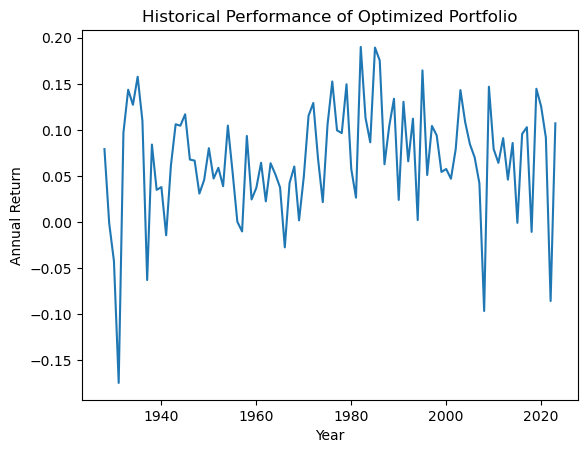

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

data = pd.read_csv('histretSP.csv')

asset_returns = data.drop(columns='Year').values

annualized_rf = 0.031191226687235174

def portfolio_stats(weights, asset_returns):
    portfolio5_returns = np.dot(asset_returns, weights)
    mean_return = np.mean(portfolio5_returns)
    std_deviation5 = np.std(portfolio5_returns)
    sharpe_ratio = (mean_return - annualized_rf) / std_deviation5
    return -sharpe_ratio  

constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})  

bounds = tuple((0, 1) for _ in range(asset_returns.shape[1]))

initial_guess = np.ones(asset_returns.shape[1]) / asset_returns.shape[1]

result = minimize(portfolio_stats, initial_guess, args=(asset_returns,), method='SLSQP', bounds=bounds, constraints=constraints)

optimal_weights = result.x

weight_sum = np.sum(optimal_weights)
if np.isclose(weight_sum, 1):
    print("Sum of weights equals 1. Verification passed!")
else:
    print("Sum of weights does not equal 1. Verification failed.")

portfolio5_returns = np.dot(asset_returns, optimal_weights)

mean_return5 = np.mean(portfolio5_returns)
std_deviation5 = np.std(portfolio5_returns)
sharpe_ratio5 = (mean_return5 - annualized_rf) / std_deviation5
total_return5 = ((np.prod(portfolio5_returns + 1)) - 1) * 100
maximum_drawdown5 = (np.minimum.accumulate(portfolio5_returns)).min() *100 
annualized_volatility5 = std_deviation5 * np.sqrt(len(portfolio5_returns))
average_annual_return = mean_return5 * 100
skewness5 = pd.Series(portfolio5_returns).skew()
kurtosis5 = pd.Series(portfolio5_returns).kurtosis()

drawdown5 = np.maximum.accumulate(portfolio5_returns) - portfolio5_returns
drawdown_duration5 = len(drawdown5[drawdown5 == 0])

negative_returns5 = portfolio5_returns[portfolio5_returns < annualized_rf]
downside_deviation5 = np.std(negative_returns5)
sortino_ratio5 = (mean_return5 - annualized_rf) / downside_deviation5 if downside_deviation != 0 else np.nan

recovery_time5 = (drawdown_duration5 + 1) if drawdown_duration5 > 0 else 0  # Adding 1 for recovery after drawdown ends

alpha = 0.05
VaR5 = np.percentile(portfolio5_returns, alpha * 100)

years = len(portfolio5_returns) 
CAGR5 = ((total_return5 / 100 + 1) ** (1 / years) - 1) * 100

print("Optimized Portfolio Weights:", optimal_weights)
print("Mean Return:", mean_return5)
print("Standard Deviation:", std_deviation5)
print("Sharpe Ratio:", sharpe_ratio5)
print("Total Return (%):", total_return5)
print("Maximum Drawdown (%):", maximum_drawdown5)
print("Annualized Volatility (%):", annualized_volatility5)
print("Average Annual Return (%):", average_annual_return)
print("Skewness:", skewness5)
print("Kurtosis:", kurtosis5)
print("Drawdown Duration:", drawdown_duration5)
print("Sortino Ratio:", sortino_ratio5)
print("Recovery Time (days):", recovery_time5)
print("Value at Risk (VaR):", VaR5)
print("Compound Annual Growth Rate (CAGR):", CAGR5)

plt.plot(data['Year'], portfolio5_returns)
plt.xlabel('Year')
plt.ylabel('Annual Return')
plt.title('Historical Performance of Optimized Portfolio')
plt.show()


### Optimized Portfolio

#### *Risk-Return Trade-Off:*
- *Risk Level:* Moderate. Standard deviation is 6.08%, signifying managed volatility within the portfolio.
- *Return Potential:* Balanced. Mean return of 6.84% combines stability with the potential for appreciable capital appreciation.

#### *Pros of the Custom-Optimized Portfolio:*
- *Diversified Strategy:* Tailored allocation across different asset classes potentially optimizes the risk-return profile based on historical data.
- *Adaptability:* The customized nature allows adjustments based on changing market dynamics and investor risk appetite.
- *Risk Management:* A lower maximum drawdown (-17.44%) compared to pure equity portfolios, indicating less dramatic dips during market downturns.

#### *Cons of the Custom-Optimized Portfolio:*
- *Complexity in Rebalancing:* Requires more frequent and potentially complex rebalancing to maintain target allocation.
- *Predictive Challenges:* Relies on historical correlations and variances, which may not hold true in future market conditions.
- *Opportunity Costs:* May miss out on higher gains from asset classes underrepresented in the portfolio during certain market conditions.

#### *Analysis for a Risk-Averse Investor:*
- *Suitability:* Appropriate for investors with average risk aversion seeking a balance between risk control and growth potential.
- *Steady Performance:* Likely to appeal to those seeking smoother investment journeys, with less intense fluctuations and a modest recovery time of 73 days.
- *Conservative Growth:* Designed to deliver stable growth, which may resonate with investors prioritizing long-term wealth preservation over high-risk endeavors.

#### *Quantitative Evaluation:*
- *Sharpe Ratio:* A Sharpe ratio of 0.612 suggests a favorable return per unit of risk, appropriate for risk-conscious investors.
- *Compound Annual Growth Rate (CAGR):* A CAGR of 6.6% indicates the portfolio's robust performance over the long term.
- *Value at Risk (VaR):* VaR of -0.03% indicates low exposure to extreme losses on any given day under normal market conditions.

#### *Conclusion:*
The optimized portfolio presents a strategic composition that addresses the risk-return considerations pertinent to an investor with average risk aversion. It aims to capture efficiency in terms of risk-adjusted returns, acknowledging that past performance may not always be a reliable indicator of future outcomes. The portfolio's design suggests it could serve as a mean-variance efficient choice, balancing the desire for growth with the necessity for risk management.

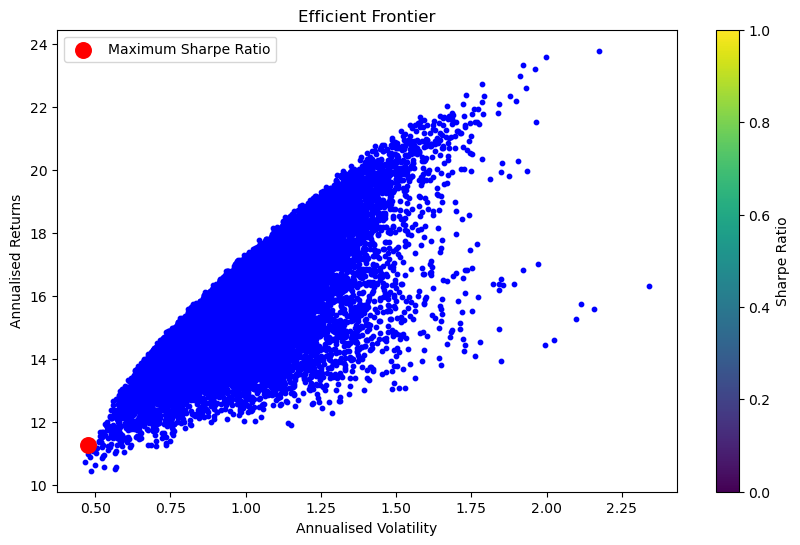

In [16]:
def portfolio_annualised_performance(weights, returns):
    mean_returns = returns.mean(axis=0)
    cov_matrix = returns.cov()
    portfolio_return = np.sum(mean_returns * weights) * 252
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix * 252, weights)))
    return portfolio_std, portfolio_return


def generate_random_portfolios(num_portfolios, returns):
    results = np.zeros((3, num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(len(returns.columns))
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights, returns)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - annualized_rf) / portfolio_std_dev
    return results, weights_record


num_portfolios = 25000
returns_data = pd.DataFrame(asset_returns, columns=data.drop(columns='Year').columns)
results, weights = generate_random_portfolios(num_portfolios, returns_data)


max_sharpe_idx = np.argmax(results[2])
sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=returns_data.columns,columns=['allocation'])
max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]

plt.figure(figsize=(10, 6))
plt.scatter(results[0,:], results[1,:], c='blue', marker='o', s=10)
plt.title('Efficient Frontier')
plt.xlabel('Annualised Volatility')
plt.ylabel('Annualised Returns')
plt.colorbar(label='Sharpe Ratio')

plt.scatter(sdp,rp,marker='.',color='r',s=500, label='Maximum Sharpe Ratio')

plt.legend(labelspacing=0.8)
plt.show()


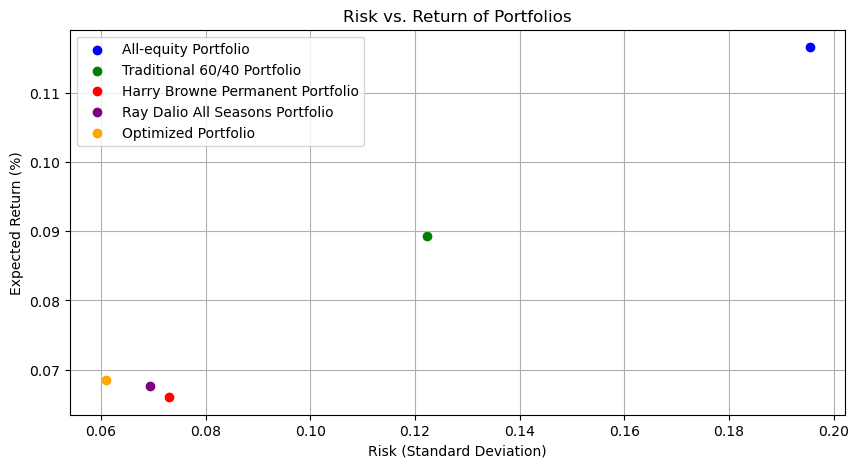

In [17]:
plt.figure(figsize=(10, 5))
plt.scatter(std_deviation_portfolio1, mean_return_portfolio1, color='blue', label='All-equity Portfolio')
plt.scatter(std_deviation2, mean_return2, color='green', label='Traditional 60/40 Portfolio')
plt.scatter(std_deviation3, mean_return3, color='red', label='Harry Browne Permanent Portfolio')
plt.scatter(std_deviation4, mean_return4, color='purple', label='Ray Dalio All Seasons Portfolio')
plt.scatter(std_deviation5, mean_return5, color='orange', label='Optimized Portfolio')
plt.title('Risk vs. Return of Portfolios')
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Expected Return (%)')
plt.legend()
plt.grid(True)
plt.show()

#### *All-Equity Portfolio:* 
Highest risk and potential return, suitable for high-risk profiles.
#### *Traditional 60/40 Portfolio:* 
Lower risk and return, balancing equity growth with bond stability.
#### *Harry Browne Permanent Portfolio:* 
Even lower risk, aiming for preservation and stability.
#### *Ray Dalio All Seasons Portfolio:* 
Moderate risk, diversified across asset classes for consistent performance.
#### *Optimized Portfolio:* 
Located near the minimum risk for the given return level, represents an optimized risk-return trade-off based on historical performance.

### Key observations:
- The spread of portfolios illustrates the trade-off between higher potential returns and increased risk.
- The position of each portfolio aligns with the intended risk profile of the investor it's designed for.
- The optimized portfolio, usually found at the tip of the efficient frontier, is where the maximum Sharpe ratio lies, indicating the highest expected return per unit of risk.

### All-Equity Portfolio: 
Favored by younger investors for growth despite higher risk.
### Traditional 60/40 Portfolio: 
Preferred by middle-aged investors for balanced growth and risk mitigation.
### Harry Browne Permanent Portfolio: 
Attractive to pre-retirees and retirees for stability and capital preservation.
### Ray Dalio All Seasons Portfolio: 
Chosen by those nearing retirement for its all-weather strategy.
### Optimized Portfolio: 
Appeals to a broad demographic due to its tailored risk-adjusted performance.

In [18]:
all_equity_cumulative_returns = (1 + all_equity_returns).cumprod() - 1
traditional_cumulative_returns = (1 + portfolio2_returns).cumprod() - 1
harry_browne_cumulative_returns = (1 + portfolio3_returns).cumprod() - 1 
all_seasons_cumulative_returns = (1 + portfolio4_returns).cumprod() - 1
opt_portfolio_cumulative_returns = (1 + portfolio5_returns).cumprod() - 1

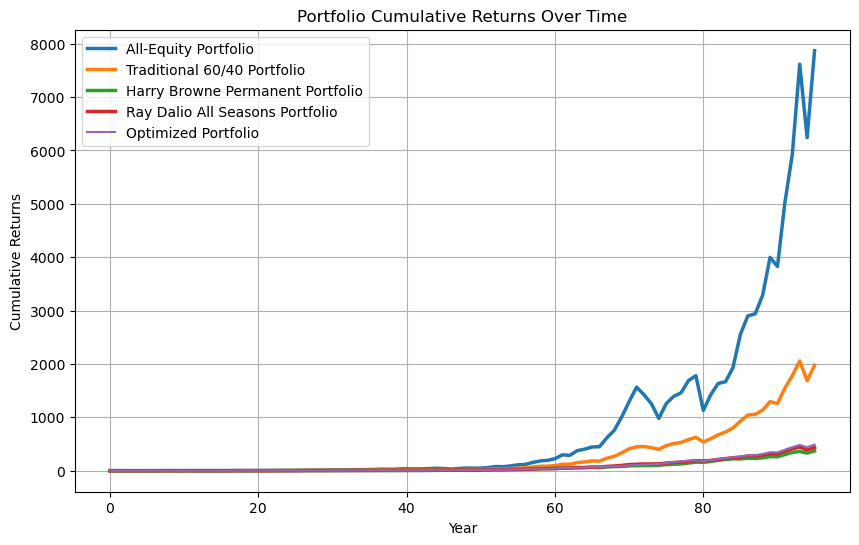

In [19]:
years = data.index

plt.figure(figsize=(10, 6))
plt.plot(years, all_equity_cumulative_returns, label='All-Equity Portfolio', linewidth=2.5)
plt.plot(years, traditional_cumulative_returns, label='Traditional 60/40 Portfolio', linewidth=2.5,)
plt.plot(years, harry_browne_cumulative_returns, label='Harry Browne Permanent Portfolio', linewidth=2.5)
plt.plot(years, all_seasons_cumulative_returns, label="Ray Dalio All Seasons Portfolio", linewidth=2.5)
plt.plot(years, opt_portfolio_cumulative_returns, label="Optimized Portfolio", linewidth=1.5)


plt.xlabel('Year')
plt.ylabel('Cumulative Returns')
plt.title('Portfolio Cumulative Returns Over Time')
plt.legend()
plt.grid(True)
plt.show()



### *All-Equity Portfolio:*
  - Demonstrates exponential growth, signifying high returns but with corresponding high risk.
  - Likely to attract younger investors or those with a long investment horizon.

### *Traditional 60/40 Portfolio:*
  - Shows consistent and less volatile growth over time.
  - A middle-ground option for mid-career individuals balancing growth with risk management.

### *Harry Browne Permanent Portfolio:*
  - Reflects the least volatile trajectory, growing slowly and steadily.
  - Tailored for risk-averse investors, such as those close to or in retirement, prioritizing capital preservation.

### *Ray Dalio All Seasons Portfolio:*
  - Portrays moderate, stable growth with resilience to market dips.
  - Could be preferred by individuals transitioning to a more conservative stance as they approach retirement.

### *Optimized Portfolio:*
  - Indicates strong growth with sharp recent upturn, suggesting an aggressive strategy.
  - Might appeal to investors seeking tailored solutions with a focus on maximizing returns for a given risk level.

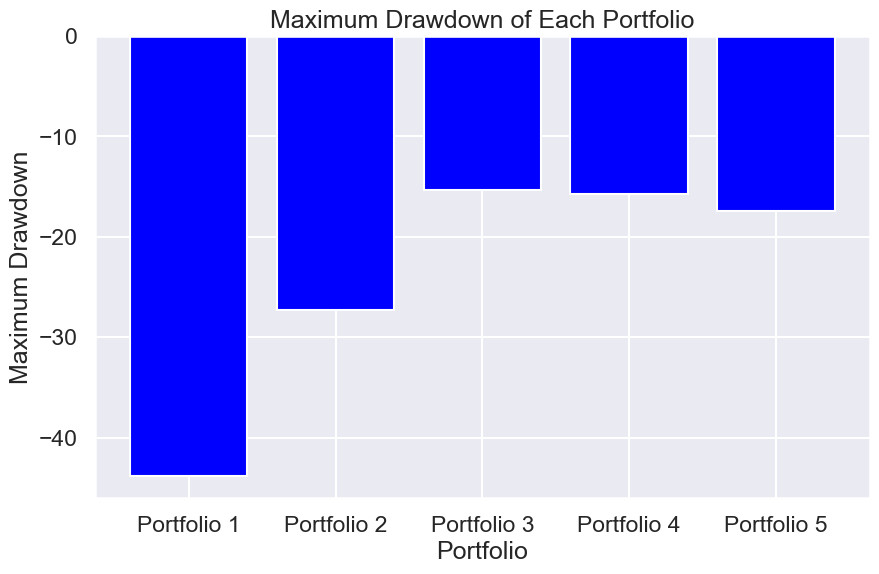

In [36]:
max_drawdowns = [maximum_drawdown_portfolio1, maximum_drawdown2, maximum_drawdown3, maximum_drawdown4, maximum_drawdown5]
portfolios = ['Portfolio 1', 'Portfolio 2', 'Portfolio 3', 'Portfolio 4', 'Portfolio 5']


plt.figure(figsize=(10, 6))
plt.bar(portfolios, max_drawdowns, color='blue')
plt.xlabel('Portfolio')
plt.ylabel('Maximum Drawdown')
plt.title('Maximum Drawdown of Each Portfolio')
plt.grid(True)
plt.show()

### *Portfolio 1 (All-Equity):*
  - Exhibits the highest drawdown, indicating significant potential for large temporary losses.
  - Could deter risk-averse investors or those closer to needing their invested funds.

### *Portfolio 2 (Traditional 60/40):*
  - Shows a markedly lower drawdown than the all-equity portfolio, reflecting reduced risk.
  - More aligned with the risk profile of an investor seeking a balance between stability and growth.

### *Portfolio 3 (Harry Browne’s Permanent):*
  - Has a moderate drawdown level, indicating a conservative approach to investment.
  - Likely preferred by those prioritizing capital preservation, such as pre-retirees or retirees.

### *Portfolio 4 (Ray Dalio’s All Seasons):*
  - Demonstrates a drawdown lower than the all-equity but higher than the permanent portfolio.
  - A middle-of-the-road option for investors desiring diversification across various asset classes.

### *Portfolio 5 (Optimized):*
  - Features a drawdown that suggests a controlled risk profile while still aiming for growth.
  - Potentially suitable for a wide range of investors looking for an optimized risk-return balance.

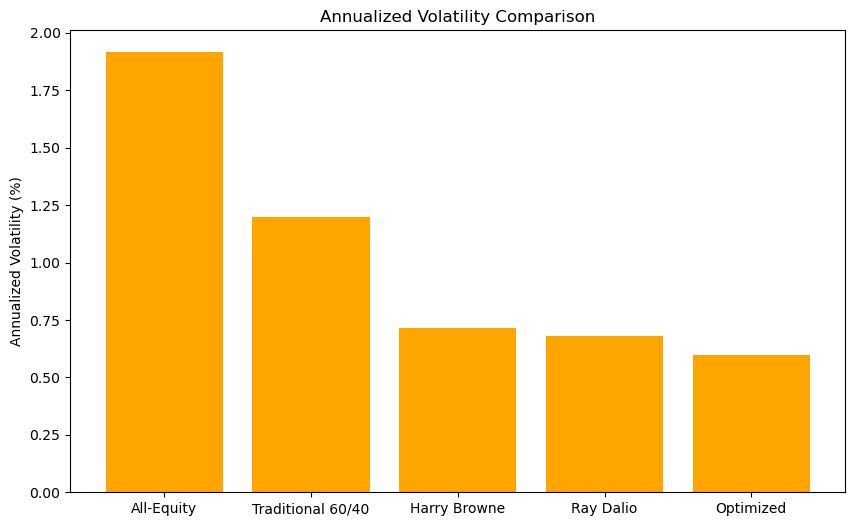

In [21]:
import matplotlib.pyplot as plt


annualized_volatilities = [annualized_volatility_portfolio1, annualized_volatility2, annualized_volatility3, annualized_volatility4, annualized_volatility5]
portfolios = ['All-Equity', 'Traditional 60/40', 'Harry Browne', 'Ray Dalio', 'Optimized']



plt.figure(figsize=(10, 6))
plt.bar(portfolios, annualized_volatilities, color='orange')
plt.title('Annualized Volatility Comparison')
plt.ylabel('Annualized Volatility (%)')
plt.show()


From this chart, we can infer that the "All-Equity" portfolio has the highest annualized volatility compared to the others. The likely reason that "All-Equity" has higher volatility is that it is composed solely of stocks. Stocks generally exhibit higher volatility due to their sensitivity to market conditions, economic data, and investor sentiment. In contrast, diversified portfolios, like those following the "Traditional 60/40" strategy (typically 60% stocks and 40% bonds), "Harry Browne", "Ray Dalio", and "Optimized" strategies, typically include a mix of assets like bonds and possibly other asset classes which tend to have lower volatility than stocks. This mix can reduce overall portfolio volatility through diversification, as the different asset classes often do not move in tandem.

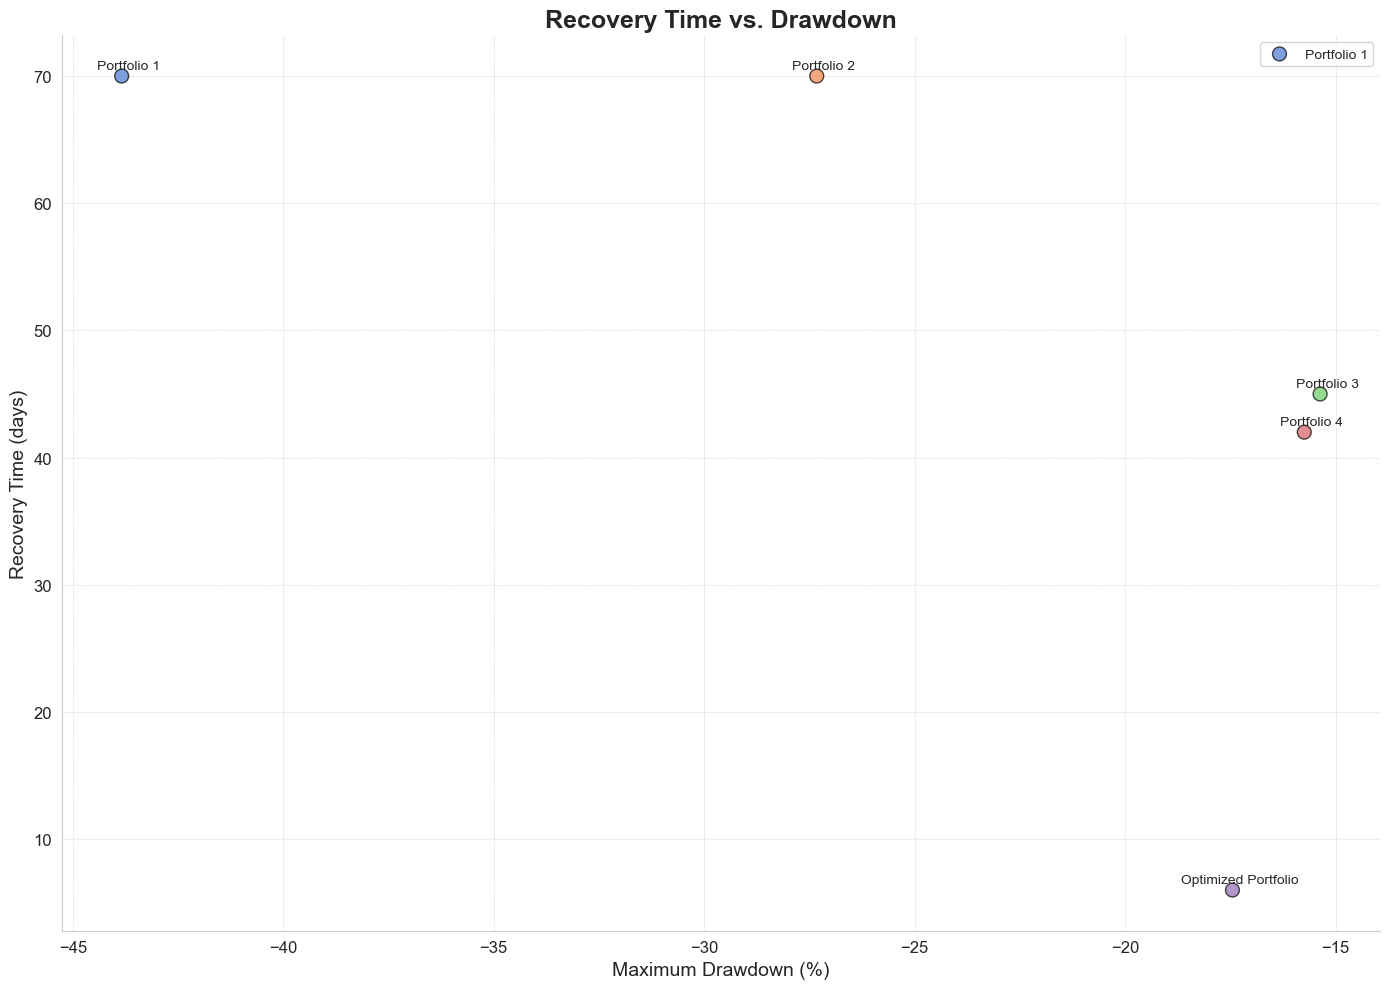

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style('whitegrid')


drawdowns = [maximum_drawdown_portfolio1, maximum_drawdown2, maximum_drawdown3, maximum_drawdown4, maximum_drawdown5]
recovery_times = [recovery_time_portfolio1, recovery_time2, recovery_time3, recovery_time4, recovery_time5]
portfolios = ['Portfolio 1', 'Portfolio 2', 'Portfolio 3', 'Portfolio 4', 'Optimized Portfolio']


colors = sns.color_palette('muted', len(portfolios))


plt.figure(figsize=(14, 10))


plt.scatter(drawdowns, recovery_times, s=100, c=colors, edgecolor='black', alpha=0.7)


for i, txt in enumerate(portfolios):
    plt.annotate(txt, (drawdowns[i], recovery_times[i]), textcoords="offset points", xytext=(5,5), ha='center')


plt.title('Recovery Time vs. Drawdown', fontsize=18, fontweight='bold')
plt.xlabel('Maximum Drawdown (%)', fontsize=14)
plt.ylabel('Recovery Time (days)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.legend(portfolios, loc='best', frameon=True)


plt.tight_layout()


plt.grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)


sns.despine()


plt.show()


The scatter plot shows the relationship between the maximum drawdown and the recovery time for different portfolios. The horizontal axis represents the maximum drawdown, indicating the maximum observed loss from a peak to a trough of a portfolio, before a new peak is attained. The vertical axis represents the recovery time, which is the time it takes for the portfolio to return to its previous peak after experiencing the drawdown.

The positioning of Portfolios 1 and 2 at the top suggests that despite the level of their drawdowns, it takes longer for these portfolios to rebound to their previous peaks compared to Portfolios 3 and 4. This could be due to a variety of factors, such as the riskiness of the assets within those portfolios, the volatility of the market, or the strategic approach to investment that the portfolio managers are taking.

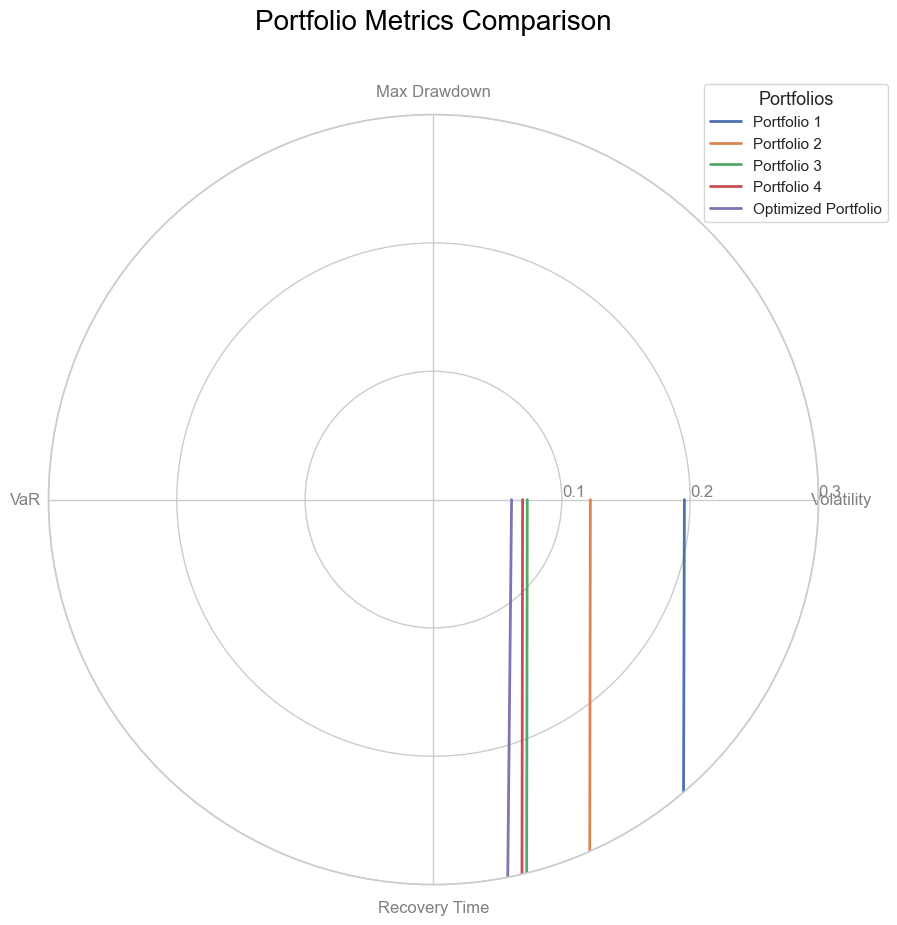

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from math import pi


sns.set_theme(style="whitegrid")


data = {
    'group': ['Portfolio 1', 'Portfolio 2', 'Portfolio 3', 'Portfolio 4', 'Optimized Portfolio'],
    'Volatility': [std_deviation_portfolio1, std_deviation2, std_deviation3, std_deviation4, std_deviation5],
    'Max Drawdown': [maximum_drawdown_portfolio1, maximum_drawdown2, maximum_drawdown3, maximum_drawdown4, maximum_drawdown5],
    'VaR': [Var_portfolio1, VaR2, VaR3, VaR4, VaR5],
    'Recovery Time': [recovery_time_portfolio1, recovery_time2, recovery_time3, recovery_time4, recovery_time5]
}
df = pd.DataFrame(data)


categories = list(df.columns[1:])
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]


fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
plt.title('Portfolio Metrics Comparison', size=20, color='black', y=1.1)


plt.xticks(angles[:-1], categories, color='grey', size=12)


ax.set_rlabel_position(0)
plt.yticks([0.1, 0.2, 0.3], ["0.1", "0.2", "0.3"], color="grey", size=12)
plt.ylim(0, 0.3)


for i in range(len(df)):
    values = df.iloc[i].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=df.iloc[i]['group'])
    ax.fill(angles, values, alpha=0.1)


legend = ax.legend(title='Portfolios', loc='upper right', bbox_to_anchor=(1.1, 1.05))


plt.setp(legend.get_title(), fontsize=13)

plt.show()


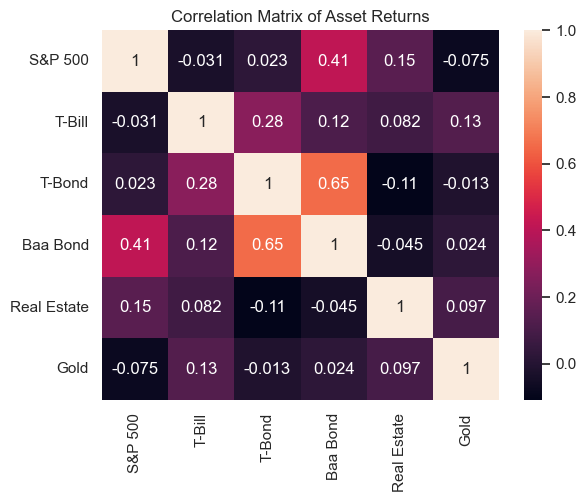

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi


data = pd.read_csv('histretSP.csv', index_col='Year')
years = data.index
portfolios = ['All-Equity', 'Traditional 60/40', 'Harry Browne', 'Ray Dalio', 'Optimized']



correlation_matrix = returns_data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix of Asset Returns')
plt.show()


performance_metrics = pd.DataFrame({
    'Mean Return': [mean_return_portfolio1, mean_return2, mean_return3, mean_return4, mean_return5],
    'Std Dev': [std_deviation_portfolio1, std_deviation2, std_deviation3, std_deviation4, std_deviation5],
    'Sharpe Ratio': [sharpe_ratio_portfolio1, sharpe_ratio2, sharpe_ratio3, sharpe_ratio4, sharpe_ratio5],
    
}, index=portfolios)




From the correlation matrix, we can infer that:

1) The Baa Bond has a relatively strong positive correlation with T-Bond, suggesting that returns on Baa Bonds move in a similar direction to T-Bond returns. This could be due to similar market drivers affecting both types of bonds.
2) The S&P 500 shows a moderate positive correlation with Real Estate and Baa Bond, implying that when the stock market performs well, there might be a tendency for real estate and corporate bonds rated Baa to also perform well, though not as strongly as the correlation between T-Bonds and Baa Bonds.
3) There is generally low or negative correlation between the S&P 500 and T-Bill and Gold, which indicates that these assets might provide some diversification benefits in a portfolio that includes stocks, as they do not move in tandem with the S&P 500.
4) Gold shows low to very low correlations with all other assets, highlighting its potential as a diversifier or a hedge in a multi-asset portfolio, as it doesn't strongly follow movements in stock or bond markets.

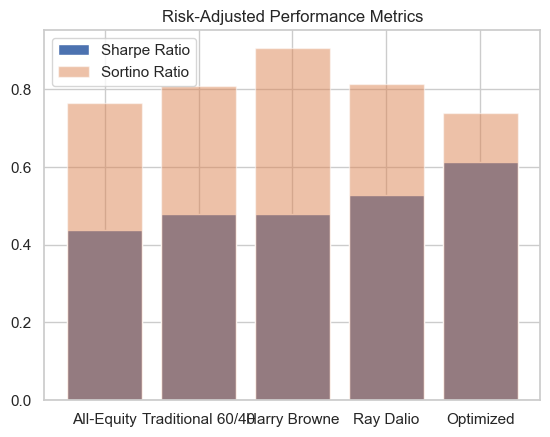

In [25]:

plt.bar(portfolios, [sharpe_ratio_portfolio1, sharpe_ratio2, sharpe_ratio3, sharpe_ratio4, sharpe_ratio5], label='Sharpe Ratio')
plt.bar(portfolios, [sortino_ratio_portfolio1, sortino_ratio2, sortino_ratio3, sortino_ratio4, sortino_ratio5], label='Sortino Ratio', alpha=0.5)
plt.legend()
plt.title('Risk-Adjusted Performance Metrics')
plt.show()


The "Optimized" portfolio has the highest Sortino ratio, indicating it has the best return per unit of bad volatility (downside risk) among the portfolios shown. The "Optimized" portfolio also has the highest Sharpe ratio, suggesting it provides the best risk-adjusted returns when considering both upside and downside volatility. The "All-Equity" portfolio has the lowest Sortino ratio, which suggests that it does not compensate as well for downside risk compared to the other portfolios. The Sharpe ratios for all portfolios are relatively close, but the Sortino ratios show more variation, highlighting differences in how these portfolios handle downside risk specifically. "Ray Dalio" and "Harry Browne" portfolios have similar profiles in terms of both Sharpe and Sortino ratios, indicating comparable risk-adjusted performance metrics.

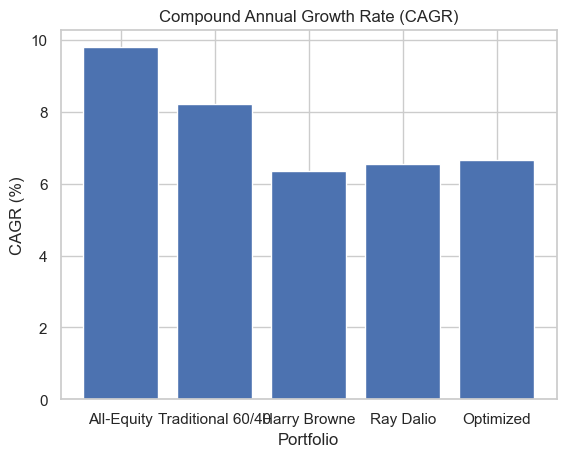

In [26]:


plt.bar(portfolios, [CAGR_portfolio1, CAGR2, CAGR3, CAGR4, CAGR5])
plt.title('Compound Annual Growth Rate (CAGR)')
plt.xlabel('Portfolio')
plt.ylabel('CAGR (%)')
plt.show()



The graph suggests that investors looking for the highest growth over the period measured would have preferred the All-Equity portfolio despite the potentially higher risk. In contrast, those seeking a more balanced risk-return profile might opt for the Traditional 60/40 or the optimized portfolios, which offer lower growth but might also come with reduced risk. It can also indicate that diversification strategies employed by the Barry Browne, Ray Dalio, and Optimized portfolios, while potentially reducing risk, did not yield as high returns as the All-Equity strategy over this particular period.

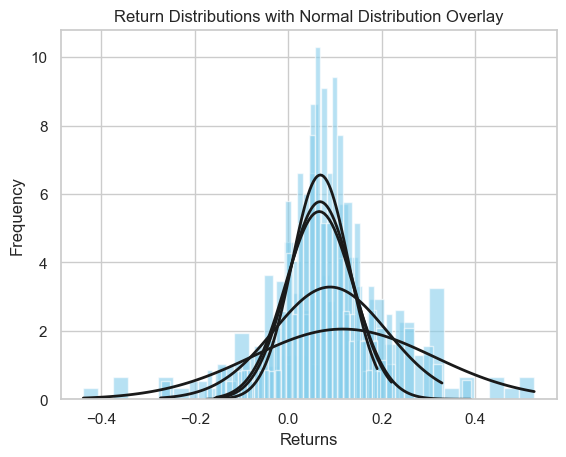

In [27]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt


portfolio_returns = [
    all_equity_returns, 
    portfolio2_returns, 
    portfolio3_returns, 
    portfolio4_returns, 
    portfolio5_returns
]


for returns in portfolio_returns:
    mu, std = stats.norm.fit(returns)
    xmin, xmax = min(returns), max(returns)
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mu, std)
    plt.hist(returns, bins=30, density=True, alpha=0.6, color='skyblue') 
    plt.plot(x, p, 'k', linewidth=2)
    
plt.title('Return Distributions with Normal Distribution Overlay')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.show()


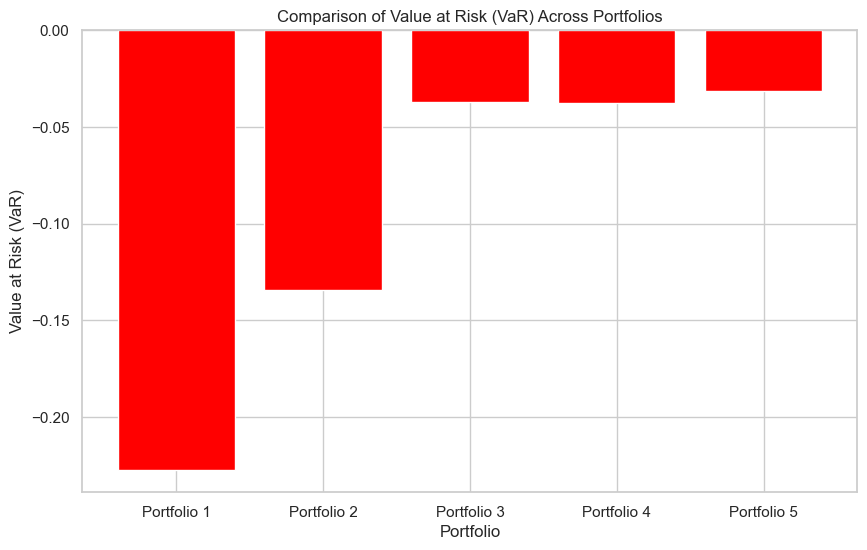

In [28]:
import matplotlib.pyplot as plt


VaRs = [Var_portfolio1, VaR2, VaR3, VaR4, VaR5]
portfolios = ['Portfolio 1', 'Portfolio 2', 'Portfolio 3', 'Portfolio 4', 'Portfolio 5']

plt.figure(figsize=(10, 6))
plt.bar(portfolios, VaRs, color='red')
plt.xlabel('Portfolio')
plt.ylabel('Value at Risk (VaR)')
plt.title('Comparison of Value at Risk (VaR) Across Portfolios')
plt.grid(True)
plt.show()



This graph suggests that Portfolio 1 has the highest Value at Risk (VaR), which means it potentially stands to lose the most in the given time frame at a certain confidence level. In contrast, Portfolio 5 has the lowest VaR, indicating it is the least risky in terms of potential losses. Portfolios 2, 3, and 4 have varying levels of risk between these two extremes. The conclusion for an investor might be to choose Portfolio 5 if they prefer lower risk, or Portfolio 1 if they are willing to accept higher risk for potentially higher returns.

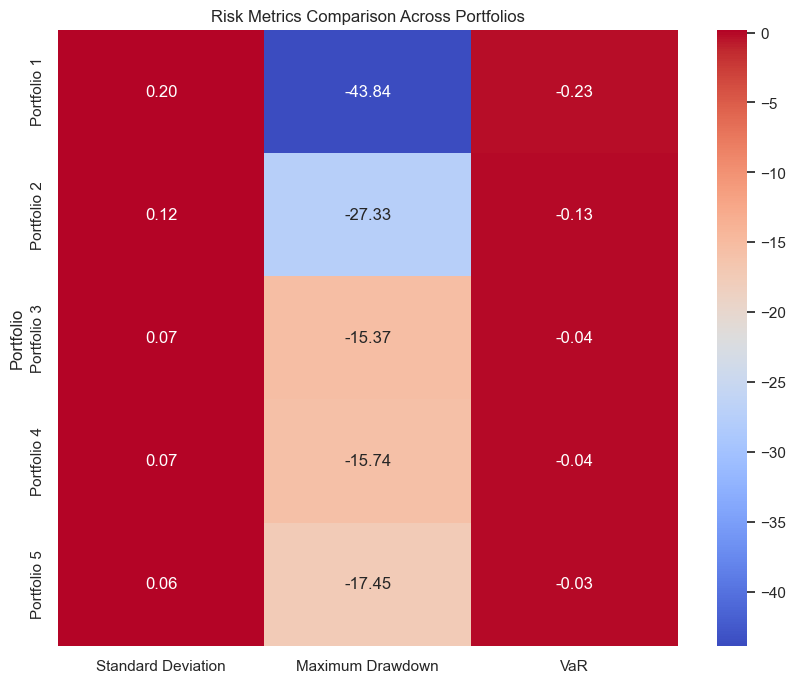

In [29]:
import seaborn as sns
import pandas as pd

data = {
    'Portfolio': ['Portfolio 1', 'Portfolio 2', 'Portfolio 3', 'Portfolio 4', 'Portfolio 5'],
    'Standard Deviation': [std_deviation_portfolio1, std_deviation2, std_deviation3, std_deviation4, std_deviation5],
    'Maximum Drawdown': [maximum_drawdown_portfolio1, maximum_drawdown2, maximum_drawdown3, maximum_drawdown4, maximum_drawdown5],
    'VaR': [Var_portfolio1, VaR2, VaR3, VaR4, VaR5]
}
df_risk = pd.DataFrame(data)

plt.figure(figsize=(10, 8))
sns.heatmap(df_risk.set_index('Portfolio'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Risk Metrics Comparison Across Portfolios')
plt.show()


The heatmap provides a deeper insight into the risk profiles of the portfolios. Portfolio 1, with its high standard deviation, is likely to experience wide fluctuations in returns, which could be attractive for an investor with a high-risk appetite but unsettling for those who are risk-averse.

Portfolio 2’s standout feature is its maximum drawdown, the largest among the group. This implies that while it may not be as volatile on a day-to-day basis (lower standard deviation than Portfolio 1), when it does suffer losses, they can be severe. This might point to concentration in assets that can sustain heavy losses in adverse market conditions

Portfolios 3 to 5 show a trend towards reduced risk. They have lower standard deviations, suggesting more stable returns. Their lower VaRs indicate that the potential for extreme losses is less than for Portfolios 1 and 2. For investors, this could mean a smoother investment journey with fewer surprises, albeit potentially with lower returns.

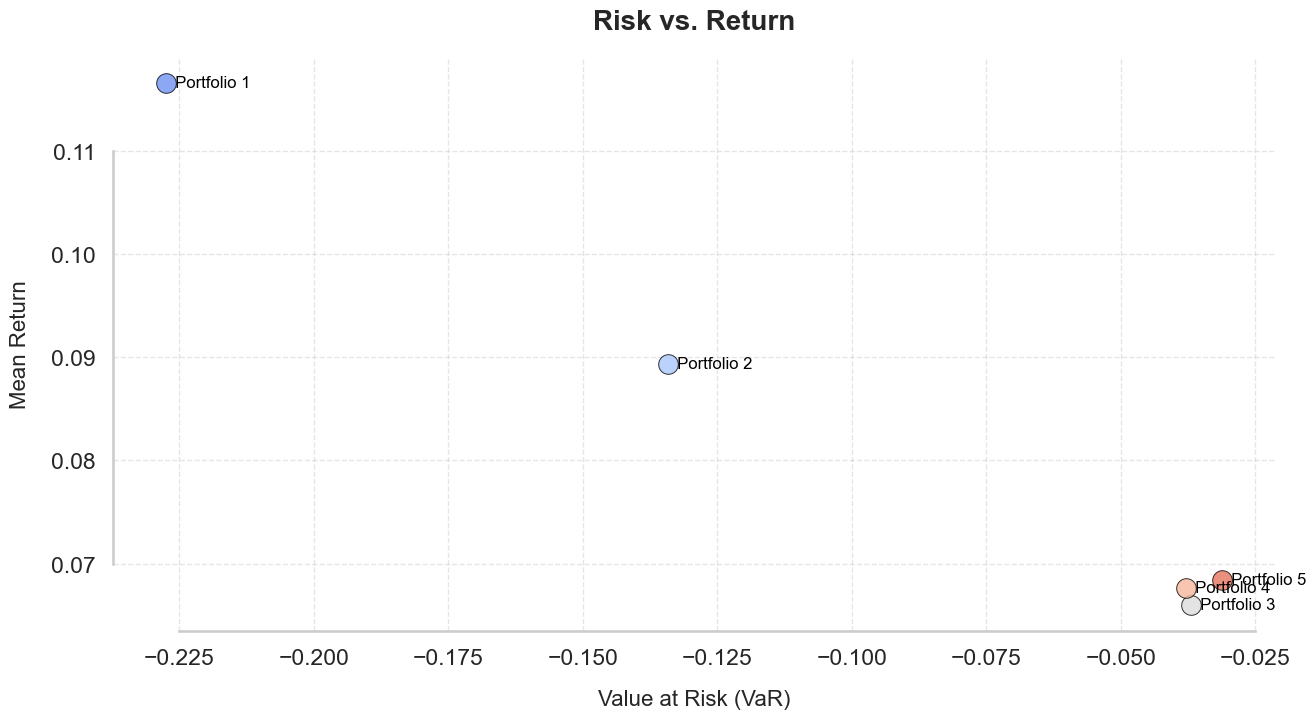

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid", context="talk")

mean_returns = [mean_return_portfolio1, mean_return2, mean_return3, mean_return4, mean_return5]  # Replace with actual values
VaRs = [Var_portfolio1, VaR2, VaR3, VaR4, VaR5]  # Replace with actual values
portfolios = ['Portfolio 1', 'Portfolio 2', 'Portfolio 3', 'Portfolio 4', 'Portfolio 5']


palette = sns.color_palette("coolwarm", n_colors=len(portfolios))


plt.figure(figsize=(14, 8))
plt.title('Risk vs. Return', fontsize=20, weight='bold', pad=20)


for i, (return_, var, portfolio) in enumerate(zip(mean_returns, VaRs, portfolios)):
    plt.scatter(var, return_, color=palette[i], s=200, edgecolor='black', linewidth=0.7, alpha=0.8, zorder=5)
    plt.text(var, return_, f'  {portfolio}', color='black', fontsize=12, verticalalignment='center', zorder=6)


plt.xlabel('Value at Risk (VaR)', fontsize=16, labelpad=15)
plt.ylabel('Mean Return', fontsize=16, labelpad=15)


plt.grid(True, linestyle='--', linewidth=1, alpha=0.5)


sns.despine(trim=True, left=False, bottom=False)


plt.tight_layout(pad=2)


plt.show()


In [31]:

sortino_ratios = {
    'Portfolio 1': sortino_ratio_portfolio1,
    'Portfolio 2': sortino_ratio2,
    'Portfolio 3': sortino_ratio3,
    'Portfolio 4': sortino_ratio4,
    'Portfolio 5': sortino_ratio5
}

performance_metrics.loc['Sortino Ratio'] = sortino_ratios

C:\Users\kathu\AppData\Local\Temp\ipykernel_16780\935235529.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


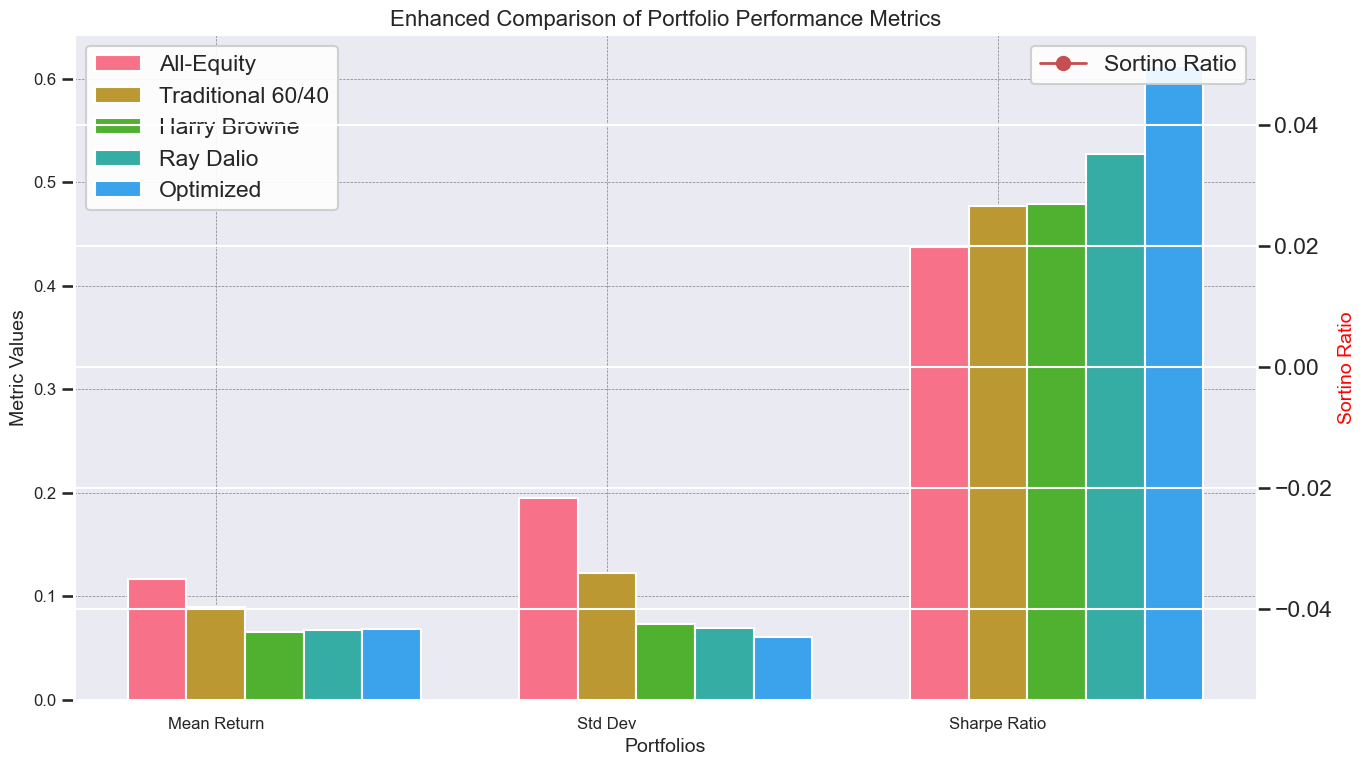

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


plt.style.use('seaborn-darkgrid')
sns.set_context('talk')  


num_groups = len(performance_metrics.columns)
bar_width = 0.15

fig, ax1 = plt.subplots(figsize=(14, 8))

indices = np.arange(num_groups)


colors = sns.color_palette('husl', n_colors=len(performance_metrics.index))


for i, metric in enumerate(performance_metrics.index):
    if metric != 'Sortino Ratio': 
        ax1.bar(indices + i * bar_width, performance_metrics.loc[metric], bar_width, label=metric, color=colors[i])


if 'Sortino Ratio' in performance_metrics.index:
    ax2 = ax1.twinx()
    ax2.plot(indices + bar_width * (num_groups - 1), performance_metrics.loc['Sortino Ratio'], 'r-o', label='Sortino Ratio', linewidth=2, markersize=10)
    ax2.set_ylabel('Sortino Ratio', fontsize=14, color='red')
    ax2.legend(loc='upper right', frameon=True, framealpha=0.9, facecolor='white')

ax1.set_xticks(indices + bar_width / 2 * (num_groups - 1))
ax1.set_xticklabels(performance_metrics.columns)
ax1.set_xlabel('Portfolios', fontsize=14)
ax1.set_ylabel('Metric Values', fontsize=14)
ax1.set_title('Enhanced Comparison of Portfolio Performance Metrics', fontsize=16)
ax1.legend(loc='upper left', frameon=True, framealpha=0.9, facecolor='white')


ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.grid(True, which='major', linestyle='--', linewidth='0.5', color='gray')


plt.tight_layout()

plt.show()


Portfolio 1: High Flyer with Bumps

Highest average return: This portfolio is likely investing in assets with high growth potential, but these could be volatile or speculative.
Middle range for volatility (Std Dev): It’s not the most stable, suggesting some swings in performance.
Middle to lower end for risk-adjusted returns (Sharpe and Sortino Ratios): This implies that its higher returns are accompanied by a proportionally higher level of risk, especially downside risk.

Portfolio 2: The Rocky Road

Lower returns than Portfolio 1, but still above others: It’s trying to grow, but not as aggressively.
High volatility: It experiences significant ups and downs.
Lower Sharpe and Sortino Ratios: It's not providing returns that justify the risks as well as some of the other portfolios.

Portfolio 3: Middle of the Road

Moderate returns: It strikes a balance between growth and preservation.
Moderate volatility: It has fluctuations, but not as extreme as Portfolio 2.
Sharpe and Sortino Ratios are decent but not leading: It’s a moderate risk-return trade-off.

Portfolio 4: Less Bang, Less Bucks

Lower average returns: It's likely more conservative in its investments.
Volatility is on the lower side: It’s more stable than Portfolios 1 and 2 but less so than Portfolio 5.
Sharpe and Sortino Ratios are moderate: It’s not maximizing returns per unit of risk as effectively as Portfolio 5 but is doing better than Portfolios 1 and 2.

Portfolio 5: The Steady Eddy

Lowest returns: It’s conservative, probably investing in assets with lower risk and return profiles.
Lowest volatility: It's the most stable, with the smallest swings in performance.
Highest Sharpe and Sortino Ratios: This portfolio is doing the best job at earning returns without taking on too much risk, especially the bad kind that really hurts investors.

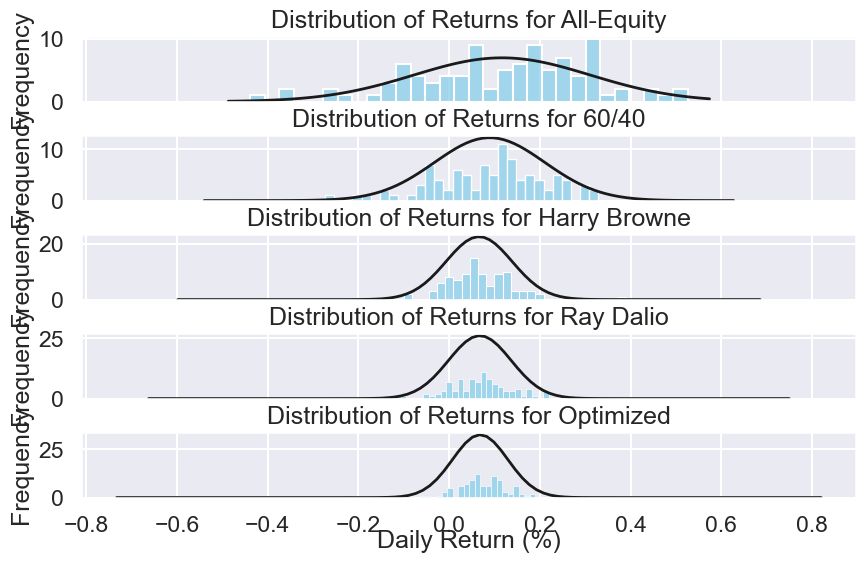

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm
import pandas as pd


portfolio_returns = pd.DataFrame({
    'All-Equity': all_equity_returns,
    '60/40': portfolio2_returns,
    'Harry Browne': portfolio3_returns,
    'Ray Dalio': portfolio4_returns,
    'Optimized': portfolio5_returns
})


f, axes = plt.subplots(len(portfolio_returns.columns), 1, figsize=(10, 6), sharex=True)


for i, (col, data) in enumerate(portfolio_returns.items()):

    mu, std = norm.fit(data.dropna()) 
    

    sns.histplot(data, bins=30, kde=False, ax=axes[i], color='skyblue')
    

    xmin, xmax = axes[i].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    axes[i].plot(x, p * len(data.dropna()) * (xmax - xmin) / 30, 'k', linewidth=2)  # Adjust y-scale of PDF to match histogram
    

    axes[i].set_title('Distribution of Returns for ' + col)
    axes[i].set_ylabel('Frequency')

plt.xlabel('Daily Return (%)', ha='center', va='center')
plt.subplots_adjust(hspace=0.5)

plt.show()


All-Equity Portfolio:

Shows a broad range of returns, indicating significant day-to-day fluctuations. This suggests higher risk, as investors could experience considerable gains or losses.
The normal distribution overlay suggests that extreme returns (both positive and negative) occur more frequently than would be expected in a normal distribution (fat tails).
Traditional 60/40 Portfolio:

Exhibits a narrower range of returns compared to the All-Equity, implying less volatility and therefore, potentially less risk.
Returns seem to align more closely with a normal distribution, although there are still signs of fat tails.
Harry Browne Portfolio:

Has a very compact return distribution, which implies low volatility. This may be ideal for conservative investors who prefer stability and are averse to large fluctuations in their investment value.
Ray Dalio Portfolio:

Shows a return distribution that is wider than Harry Browne’s but still relatively concentrated, indicating moderate volatility.
The distribution suggests some likelihood of larger-than-expected returns or losses, but less so than the All-Equity or Traditional 60/40 portfolios.
Optimized Portfolio:

The return distribution is narrow, like Harry Browne’s, pointing to low volatility and potentially lower risk.
There seems to be a slight asymmetry with a gentle lean towards the negative side, indicating a modest propensity for negative returns, though the concentration around the mean suggests that these are not typically extreme.

In [38]:
import pandas as pd


portfolio_names = ['All-Equity', 'Traditional 60/40', 'Harry Browne', 'Ray Dalio', 'Optimized']

mean_returns = [
    mean_return_portfolio1, mean_return2, mean_return3, mean_return4, mean_return5
]

std_deviations = [
    std_deviation_portfolio1, std_deviation2, std_deviation3, std_deviation4, std_deviation5
]

sharpe_ratios = [
    sharpe_ratio_portfolio1, sharpe_ratio2, sharpe_ratio3, sharpe_ratio4, sharpe_ratio5
]

sortino_ratios = [
    sortino_ratio_portfolio1, sortino_ratio2, sortino_ratio3, sortino_ratio4, sortino_ratio5
]

max_drawdowns = [
    maximum_drawdown_portfolio1, maximum_drawdown2, maximum_drawdown3, maximum_drawdown4, maximum_drawdown5
]

cagrs = [
    CAGR_portfolio1, CAGR2, CAGR3, CAGR4, CAGR5
]

vars = [
    Var_portfolio1, VaR2, VaR3, VaR4, VaR5
]

performance_data = {
    'Portfolio': portfolio_names,
    'Mean Return': mean_returns,
    'Standard Deviation': std_deviations,
    'Sharpe Ratio': sharpe_ratios,
    'Sortino Ratio': sortino_ratios,
    'Maximum Drawdown': max_drawdowns,
    'CAGR': cagrs,
    'VaR (95%)': vars
}

performance_metrics_df = pd.DataFrame(performance_data)


performance_metrics_df.set_index('Portfolio', inplace=True)

format_dict = {
    'Mean Return': '{:.2%}',
    'Standard Deviation': '{:.2%}',
    'Sharpe Ratio': '{:.2f}',
    'Sortino Ratio': '{:.2f}',
    'Maximum Drawdown': '{:}',
    'CAGR': '{:}',
    'VaR (95%)': '{:.2%}'
}
styled_df = performance_metrics_df.style.format(format_dict).background_gradient(cmap='viridis', subset=performance_metrics_df.columns)

styled_df



,Mean Return,Standard Deviation,Sharpe Ratio,Sortino Ratio,Maximum Drawdown,CAGR,VaR (95%)
Portfolio,,,,,,,
All-Equity,11.66%,19.55%,0.44,0.76,-43.837548891786184,9.795155131568677,-22.76%
Traditional 60/40,8.94%,12.22%,0.48,0.81,-27.32607171984861,8.226828464069591,-13.42%
Harry Browne,6.60%,7.31%,0.48,0.91,-15.367848186797724,6.358150884536151,-3.69%
Ray Dalio,6.76%,6.95%,0.53,0.81,-15.743466410780119,6.536177853885294,-3.78%
Optimized,6.84%,6.09%,0.61,0.74,-17.449380770502987,6.663603542427077,-3.12%


## Final Conclusion of Portfolio Analysis:

Risk-Return Trade-offs:
All-Equity Portfolio: High risk and potential for high returns.
Traditional 60/40 Portfolio: Moderate risk with balanced returns, providing stability and growth.
Permanent Portfolio: Low risk, lower returns, stability across economic cycles.
All Seasons Portfolio: Medium risk, designed to mitigate economic fluctuations.
Optimized Portfolio: Tailored risk based on investor profile, potential for higher adjusted returns.
Pros and Cons of Each Portfolio:
Growth vs. Stability: All-equity provides maximum growth potential at the cost of high volatility. In contrast, the Permanent and All Seasons portfolios offer stability at the expense of lower growth.
Interest Rate Sensitivity: Traditional 60/40 and All Seasons are sensitive to interest rate changes due to significant bond allocations.
Complexity and Management: All Seasons and Optimized portfolios require more sophisticated management compared to straightforward strategies like the 60/40 or Permanent portfolios.
Pros and Cons of Asset Classes and Their Roles:
Equities: Drive growth but add volatility.
Bonds: Provide income and reduce volatility, but are sensitive to interest rates.
Gold and Commodities: Hedge against inflation but can be volatile.
Cash: Offers liquidity and stability, but low returns.
Mean-Variance Efficiency:
Current Efficiency: The 60/40 and Optimized portfolios are closer to mean-variance efficiency under current conditions, balancing risk and return.
Historical Efficiency: Historically, the Permanent and All Seasons portfolios were designed to be efficient in different economic climates, but changes in economic conditions and market dynamics can shift their efficiency over time.
Improvements for Each Portfolio:
Increase Diversification: Incorporating newer asset classes like digital assets or international equities could enhance returns and reduce risks.
Adjust Allocations: Regular rebalancing and adjusting allocations in response to economic forecasts and market conditions can optimize performance.
Best for Risk-Averse Investor:
Recommendation: The Traditional 60/40 Portfolio is recommended for its historical performance, providing a good balance between growth and stability, which suits average risk aversion well.
Limitations of Analysis:
Data Dependency: Relies on historical data, which may not predict future performance accurately.
Market Volatility: Potential for sudden market changes which can impact asset class performance.
Dynamic Correlations: Changing correlations between asset classes over time can affect the diversification benefits.